In [15]:
import pandas
from flows_n_snows import config, utils
import matplotlib.pyplot as plt

In [17]:
flow_df = utils.fetch_river_flows(config.river_gauge,'1980-01-01','2021-01-01')
flow_df['datetime'] = flow_df.index
flow_df['doy'] = flow_df.datetime.dt.dayofyear

processing data from request: https://waterservices.usgs.gov/nwis/dv/?format=waterml&site=09337500&startDT=1980-01-01&endDT=2021-01-01


In [13]:
list(flow_df)

['value', 'qualifiers', 'datetime', 'doy']

In [18]:
stat_list = ['count','min','max','mean','std','median','mad']
doy_stats = flow_df.groupby('doy').agg(stat_list)['value']
doy_stats

,count,min,max,mean,std,median,mad
doy,,,,,,,
1,42,0.38,23.0,5.667381,5.081322,4.135,3.710544
2,41,0.44,19.0,5.754390,4.752735,4.110,3.632552
3,41,0.50,23.0,6.108780,5.153557,4.100,4.017359
4,41,0.59,20.0,5.939756,4.752115,4.100,3.720155
5,41,0.68,30.0,6.485366,5.882189,4.240,4.191981
...,...,...,...,...,...,...,...
362,41,0.11,19.0,5.846098,5.205033,3.760,4.067650
363,41,0.58,20.0,5.883415,4.993300,4.200,3.907591
364,41,0.50,23.0,5.671707,4.887860,4.000,3.507864


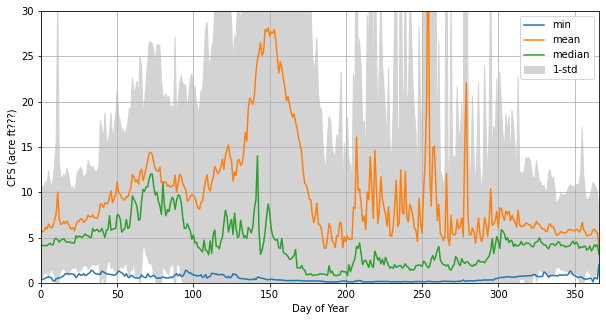

In [25]:
f,ax = plt.subplots(figsize=(10,5))

for stat in ['min','mean','median']:
    ax.plot(doy_stats.index, doy_stats[stat], label=stat)

ax.fill_between(doy_stats.index, doy_stats['mean'] - doy_stats['std'], doy_stats['mean'] + doy_stats['std'], \
                color='lightgrey', label='1-std')

# title = f'{sitecode}: \n{values_df.index.min().date()} to {values_df.index.max().date()} ({nyears:.2f} years)'

# ax.set_title(title)
ax.set_xlabel('Day of Year')
ax.set_ylabel('CFS (acre ft???)')
ax.grid()
ax.legend()
ax.set_xlim(0,366)
ax.set_ylim(0,30);
plt.savefig('escalante')